In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

In [5]:
def loss_linear(x_, y_, y_points, beta_1, beta_2):
    return np.sqrt(np.square(y_points - (x_*beta_1+ y_*beta_2)).sum())/x_.shape[0]
    

In [6]:
def loss_one_x_squared(x_, y_, y_points, beta_1, beta_2):
    return np.sqrt(np.square(y_points - (beta_1*x_**2+ y_*beta_2)).sum())/x_.shape[0]
    

In [7]:
num_data = 100
noise = 0.05

x = 1+ np.random.rand(num_data)
y_un_corr = 1+ 10*np.random.rand(num_data)
y_corr = 10*x + noise*np.random.rand(num_data).reshape(x.shape)
# x_train = np.concatenate((x,y), axis=1)

x_dot_linear = lambda x,y: 2*x

x_dot_quadratic = lambda x,y: 2*x**2


coef_range = [-4,4]
col_num = 100

X, Y = np.meshgrid(np.linspace(coef_range[0], coef_range[1], col_num), np.linspace(coef_range[0], coef_range[1], col_num))


In [8]:
num_data = 100
noise = 0.05

x = 1+ np.random.rand(num_data)
y_un_corr = 1+ np.random.rand(num_data)
y_corr = x + noise*np.random.rand(num_data).reshape(x.shape)
# x_train = np.concatenate((x,y), axis=1)

x_dot_linear = lambda x,y: 2*x

x_dot_quadratic = lambda x,y: 2*x**2


coef_range = [-4,4]
col_num = 100

X, Y = np.meshgrid(np.linspace(coef_range[0], coef_range[1], col_num), np.linspace(coef_range[0], coef_range[1], col_num))


In [9]:
np.corrcoef(x,y_corr)

array([[1.        , 0.99888119],
       [0.99888119, 1.        ]])

In [10]:
np.corrcoef(x,y_un_corr)

array([[1.        , 0.05728491],
       [0.05728491, 1.        ]])

## Linear regression (with only linear terms)

$\frac{dx}{dt}=2x$

### Un-Correlated

In [11]:
x_dot_meas = x_dot_linear(x,y_un_corr) + noise*np.random.rand(num_data).reshape(x.shape)

Z_lin_uncor = np.array([ [loss_linear(x,y_un_corr, x_dot_meas, X[i][j], Y[i][j]) for j in range(X.shape[1])] for i in range(X.shape[0]) ])


### Correlated

In [12]:
x_dot_meas = x_dot_linear(x,y_corr) + noise*np.random.rand(num_data).reshape(x.shape)

Z_lin_cor = np.array([ [loss_linear(x,y_corr, x_dot_meas, X[i][j], Y[i][j]) for j in range(X.shape[1])] for i in range(X.shape[0]) ])

## Poly regression (with quadratic terms)

$\frac{dx}{dt}=2x^2$

### Un-Correlated

In [13]:
x_dot_meas = x_dot_quadratic(x,y_un_corr) + noise*np.random.rand(num_data).reshape(x.shape)

Z_quad_uncor = np.array([ [loss_one_x_squared(x,y_un_corr, x_dot_meas, X[i][j], Y[i][j]) for j in range(X.shape[1])] for i in range(X.shape[0]) ])


### Correlated

In [14]:
x_dot_meas = x_dot_quadratic(x,y_corr) + noise*np.random.rand(num_data).reshape(x.shape)

Z_quad_cor = np.array([ [loss_one_x_squared(x,y_corr, x_dot_meas, X[i][j], Y[i][j]) for j in range(X.shape[1])] for i in range(X.shape[0]) ])

### Contours 

In [15]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [16]:
ax = fig.add_subplot(1,2,1,projection='3d')

In [17]:
surf1 = ax.plot_surface(X,Y,Z_lin_uncor)
ax.set(xlim=coef_range, ylim=coef_range,
       xlabel='X', ylabel='Y', zlabel='Z')

[(-4.0, 4.0),
 (-4.0, 4.0),
 Text(0.5, 0, 'X'),
 Text(0.5, 0.5, 'Y'),
 Text(0.5, 0, 'Z')]

In [18]:
plt.show()

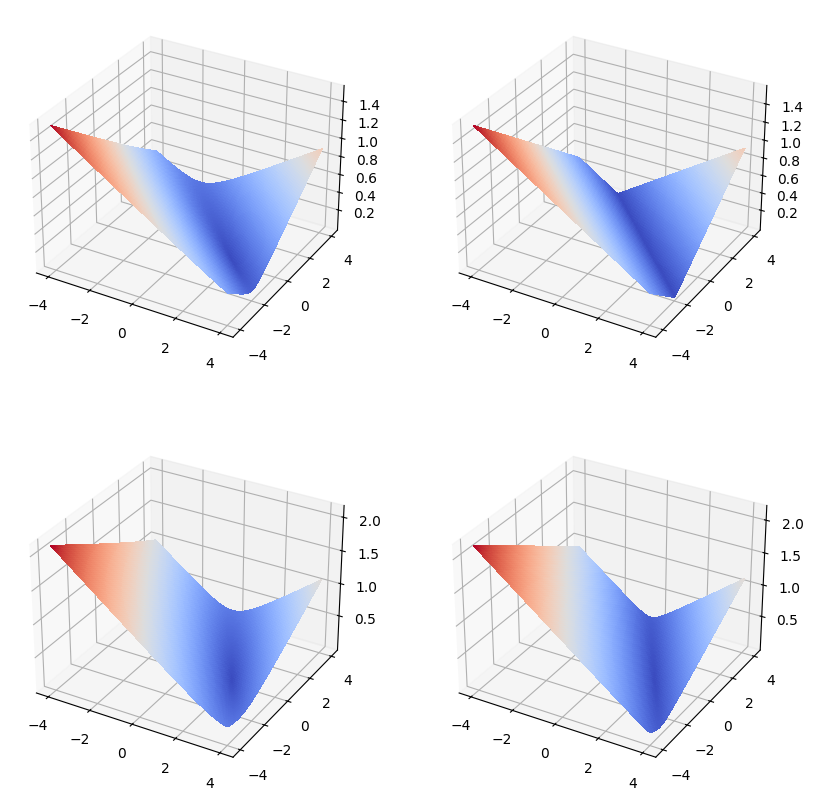

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# set up a figure twice as wide as it is tall
# fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=(10,10))
# =============
# Uncorrelated linear
# =============
# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z_lin_uncor, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# ==============
# Correlated linear
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(2, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_surface(X,Y,Z_lin_cor, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax = fig.add_subplot(2, 2, 3, projection='3d')
surf = ax.plot_surface(X, Y, Z_quad_uncor, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# ==============
# Correlated quad
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(2, 2, 4, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_surface(X,Y,Z_quad_cor, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


## Contour plots

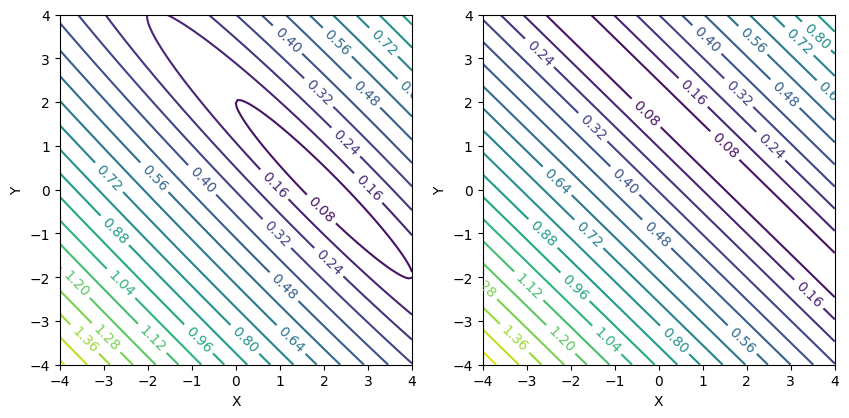

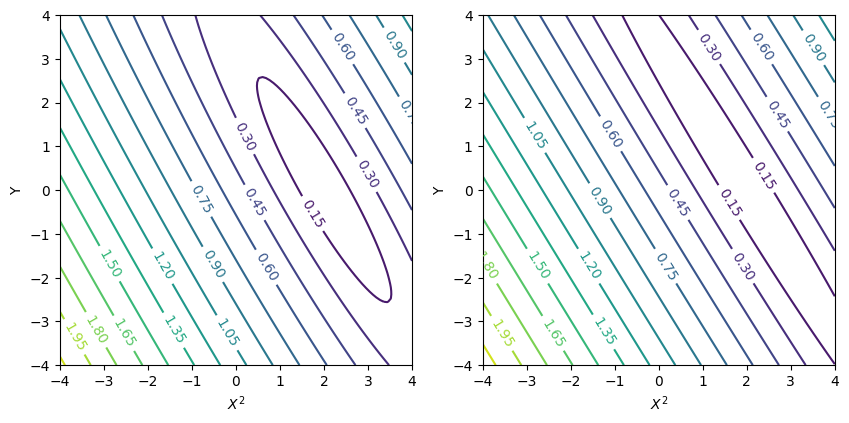

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
CS = plt.contour(X, Y, Z_lin_uncor,20)   # set levels automatically
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')


plt.subplot(2,2,2)
CS = plt.contour(X, Y, Z_lin_cor, 20)  # set levels as previous levels
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
# plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
CS = plt.contour(X, Y, Z_quad_uncor,20)   # set levels automatically
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$X^2$')
plt.ylabel('Y')

plt.subplot(2,2,4)
CS = plt.contour(X, Y, Z_quad_cor, 20)  # set levels as previous levels
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$X^2$')
plt.ylabel('Y')
plt.show()

In [21]:
plt.savefig('contour_lines.pdf', format='pdf')

<Figure size 640x480 with 0 Axes>

### Optimum values

In [101]:
X[np.where(Z_lin_uncor == Z_lin_uncor.min())], Y[np.where(Z_lin_uncor == Z_lin_uncor.min())]

(array([1.8989899]), array([0.04040404]))

In [102]:
X[np.where(Z_lin_cor == Z_lin_cor.min())], Y[np.where(Z_lin_cor == Z_lin_cor.min())]

(array([-3.27272727]), array([0.52525253]))

In [103]:
X[np.where(Z_quad_uncor == Z_quad_uncor.min())], Y[np.where(Z_quad_uncor == Z_quad_uncor.min())]

(array([1.8989899]), array([0.04040404]))

In [104]:
X[np.where(Z_quad_cor == Z_quad_cor.min())], Y[np.where(Z_quad_cor == Z_quad_cor.min())]

(array([1.73737374]), array([0.04040404]))